In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
csv_path= '/Users/y1u0d2/Desktop/Lab/result/sf/sf_csv/atom/concat_Si.csv'

In [40]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv(csv_path)
# df = df[df.structure == 'beta-quartz']
descriptor_labels = []
for column in df.columns:
    if 'sf_' in column:
        descriptor_labels.append(column)

target_label ='E_atom'
Xraw = df.loc[:, descriptor_labels]
y = df.loc[:, target_label]

scaler = StandardScaler()
scaler.fit(Xraw)
X = scaler.transform(Xraw)


In [41]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


def linear_regression_CV_score(X, y, alpha, n_splits=10):
    """Ridge regression with the CV score

    Args:
        X (np.array): descriptor
        y (np.array): target variable
        alpha (float): hyperparameter of Ridge regression
        n_splits (int, optional): the number of splits in CV. Defaults to 10.

    Returns:
        float: the mean value of test scores of CV
        float: the stddev value of test scores of CV
    """
    reg = Ridge(alpha=alpha)
    kf = KFold(n_splits=n_splits, shuffle=True)
    test_score_list = []
    for train, test in kf.split(X):
        Xtrain, ytrain = X[train], y[train]
        Xtest, ytest = X[test], y[test]
        reg.fit(Xtrain, ytrain)
        test_score = reg.score(Xtest, ytest)
        test_score_list.append(test_score)
    return np.mean(test_score_list), np.std(test_score_list)


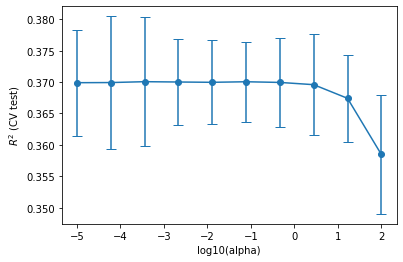

In [42]:
mean_score_list = []
std_score_list = []
alpha_list = np.logspace(-5, 2, 10)
for alpha in alpha_list:
    mean_score, std_score = linear_regression_CV_score(X, y, alpha)
    mean_score_list.append(mean_score)
    std_score_list.append(std_score)
plt.figure()
plt.errorbar(np.log10(alpha_list), mean_score_list,
             yerr=std_score_list, fmt="o-", capsize=5)
plt.xlabel("log10(alpha)")
plt.ylabel("$R^2$ (CV test)")
# plt.savefig("image_executed/alpha_vs_R2.png")
plt.show()

In [43]:
i_alpha_opt = np.argmax(mean_score_list)
print(i_alpha_opt)
alpha_opt = alpha_list[i_alpha_opt]
print(alpha_opt)


2
0.00035938136638046257


In [44]:
reg = Ridge(alpha=alpha_opt)
reg.fit(X,y)


Ridge(alpha=0.00035938136638046257)

In [45]:
def plot_y_yp(y,yp):
    """scater plot , y vs yp

    Args:
        y (list): experimental values
        y (list): predicted values
    """
    plt.figure(figsize=(5, 5))
    plt.plot(y, yp, "o")
    yall = np.hstack([y, yp])
    ylim = yall.min(), yall.max()
    plt.plot(ylim, ylim, "--")
    plt.xlabel("$y_{expr}$")
    plt.ylabel("$y_{pred}$")
    plt.show()


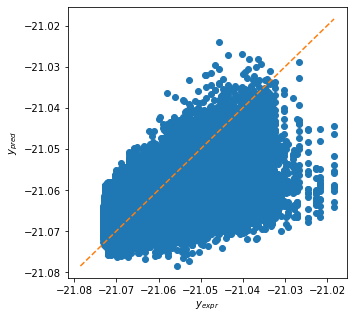

In [46]:
yp = reg.predict(X)
plot_y_yp(y,yp)

In [47]:
def Ridge_regression_CV_yp_coef(alpha, X, y, n_splits=10, random_state=1):
    """linear regression with cross validation

    Args:
        alpha (float): hyperparameter
        X (np.array): descriptor
        y (np.array): target variable
        n_splits (int, optional): the number of splits in CV. Defaults to 10.
        random_state (int, optional): random state in KFold(). Defaults to 1.

    Returns:
        list: a list of linear coefficients
    """
    reg = Ridge(alpha=alpha)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    coef_list = []
    ytest_list = []
    ytestp_list = []
    for train, test in kf.split(X):
        Xtrain, ytrain = X[train], y[train]
        Xtest, ytest = X[test], y[test]
        reg.fit(Xtrain, ytrain)
        ytestp = reg.predict(Xtest)
        ytest_list.append(ytest)
        ytestp_list.append(ytestp)
        coef_list.append(list(reg.coef_.ravel()))
    return ytest_list, ytestp_list, coef_list


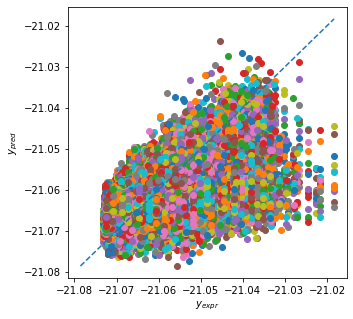

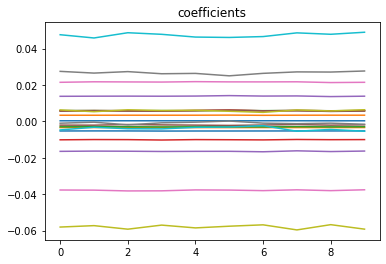

In [48]:
ytest_list, ytestp_list, coef_list = Ridge_regression_CV_yp_coef(alpha_opt, X, y, n_splits=10, random_state=1)
plot_y_yp(ytest_list, ytestp_list)

plt.title("coefficients")
img = plt.plot(coef_list)
